In [ ]:
import pandas as pd
import numpy as np
from tqdm import tqdm

In [ ]:
train_data = pd.read_csv('/content/train_2kmZucJ.csv',)
train_data = train_data.reset_index(drop = True)
test_data = pd.read_csv('/content/test_oJQbWVk.csv')
test_data = test_data.reset_index(drop = True)
combined = train_data.append(test_data, ignore_index=True)

In [ ]:
combined.shape

(9873, 3)

In [ ]:
test_data.shape

(1953, 2)

In [ ]:
train_data.head()

,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,2,0,Finally a transparant silicon case ^^ Thanks t...
2,3,0,We love this! Would you go? #talk #makememorie...
3,4,0,I'm wired I know I'm George I was made that wa...
4,5,1,What amazing service! Apple won't even talk to...


In [ ]:
test_data.head()

,id,tweet
0,7921,I hate the new #iphone upgrade. Won't let me d...
1,7922,currently shitting my fucking pants. #apple #i...
2,7923,"I'd like to puts some CD-ROMS on my iPad, is t..."
3,7924,My ipod is officially dead. I lost all my pict...
4,7925,Been fighting iTunes all night! I only want th...


In [ ]:
import nltk
import re
import string
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


**Removing Emoticons**


*   Tweet nowadays are mostly field with emoticons which are unecessary for our analysis.
*   Handling both emoticons and unnecessary punctuations.



In [ ]:
#HappyEmoticons
emoticons_happy = set([
    ':-)', ':)', ';)', ':o)', ':]', ':3', ':c)', ':>', '=]', '8)', '=)', ':}',
    ':^)', ':-D', ':D', '8-D', '8D', 'x-D', 'xD', 'X-D', 'XD', '=-D', '=D',
    '=-3', '=3', ':-))', ":'-)", ":')", ':*', ':^*', '>:P', ':-P', ':P', 'X-P',
    'x-p', 'xp', 'XP', ':-p', ':p', '=p', ':-b', ':b', '>:)', '>;)', '>:-)',
    '<3' , '^^', '^'
    ])

#Sad emoticons
emoticons_sad = set([
    ':L', ':-/', '>:/', ':S', '>:[', ':@', ':-(', ':[', ':-||', '=L', ':<',
    ':-[', ':-<', '=\\', '=/', '>:(', ':(', '>.<', ":'-(", ":'(", ':\\', ':-c',
    ':c', ':{', '>:\\', ';('
    ])

emoticons = emoticons_happy.union(emoticons_sad)

!pip install tweet-preprocessor

In [ ]:
#Emoji patterns
emoji_pattern = re.compile("["
         u"\U0001F600-\U0001F64F"  # emoticons
         u"\U0001F300-\U0001F5FF"  # symbols & pictographs
         u"\U0001F680-\U0001F6FF"  # transport & map symbols
         u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
         u"\U00002702-\U000027B0"
         u"\U000024C2-\U0001F251"
         "]+", flags=re.UNICODE)

In [ ]:
def clean_text_1(tweet):
    tweet = re.sub(r'@[\w]*', '', tweet)
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(tweet)
    #after tweepy preprocessing the colon symbol left remain after      #removing mentions
    tweet = re.sub(r':', '', tweet)
    tweet = re.sub(r'‚Ä¶', '', tweet)
    #replace consecutive non-ASCII characters with a space
    tweet = re.sub(r'[^\x00-\x7F]+',' ', tweet)#remove emojis from tweet
    tweet = emoji_pattern.sub(r'', tweet)#filter using NLTK library append it to a string
    filtered_tweet = [w for w in word_tokens if not w in stop_words]
    filtered_tweet = []#looping through conditions
    for w in word_tokens:
      #check tokens against stop words , emoticons and punctuations
      if w not in stop_words and w not in emoticons and w not in string.punctuation:
        filtered_tweet.append(w)
    return ' '.join(filtered_tweet)

round_1 = lambda x: clean_text_1(x)   

In [ ]:
def remove_urls(text):
    text = re.sub(r'(https|http)?:\/\/(\w|\.|\/|\?|\=|\&|\%)*\b', '', text, flags=re.MULTILINE)
    return text

round_2 = lambda x: remove_urls(x) 

def clean_text_2(text):
    '''Get rid of some additional punctuation and non-sensical text that was missed the first time around.'''
    text = re.sub('[‘’“”…]', '', text)
    text = re.sub('[^a-zA-Z]', '', text)
    
    return text

round_3 = lambda x: clean_text_2(x)

In [ ]:
data_clean = pd.DataFrame(combined.tweet.apply(round_2))
combined['tweet'] = pd.DataFrame(data_clean.tweet.apply(round_1))


In [ ]:
combined['tweet'] = combined['tweet'].str.replace("[^a-zA-Z#]", " ")
tokenized = combined['tweet'].apply(lambda x: x.lower())

In [ ]:
tokenized = combined['tweet'].apply(lambda x: x.split())
tokenized

0       [fingerprint, Pregnancy, Test, android, apps, ...
1       [Finally, transparant, silicon, case, Thanks, ...
2       [We, love, Would, go, talk, makememories, unpl...
3       [I, m, wired, I, know, I, m, George, I, made, ...
4       [What, amazing, service, Apple, wo, n, t, even...
                              ...                        
9868    [SamsungGalaxyNote, Explodes, Burns, Year, Old...
9869    [Now, Available, Hoodie, Check, utm, campaign,...
9870    [There, goes, crack, right, across, screen, If...
9871    [said, Adobe, big, time, may, well, include, a...
9872    [Finally, I, got, thanx, father, Samsung, gala...
Name: tweet, Length: 9873, dtype: object

In [ ]:
# ry = 'the king ^^ so as know'
# text = ry.split()
# text = re.sub('[^a-zA-Z]', '', text)
# text

In [ ]:
from nltk.stem.porter import *
stemmer = PorterStemmer()

tokenized = tokenized.apply(lambda x: [stemmer.stem(i) for i in x]) # stemming
# tokenized.head()

In [ ]:
tokenized.head()

0    [fingerprint, pregnanc, test, android, app, be...
1    [final, transpar, silicon, case, thank, uncl, ...
2    [We, love, would, go, talk, makememori, unplug...
3    [I, m, wire, I, know, I, m, georg, I, made, wa...
4    [what, amaz, servic, appl, wo, n, t, even, tal...
Name: tweet, dtype: object

In [ ]:
tokenized = tokenized.apply(stemming)
tokenized

0       [f, n, g, e, r, p, r, n,  , p, r, e, g, n, n, ...
1       [f, n, l, l,  , r, n, p, r, n,  , l, c, n,  , ...
2       [w, e,  , l, v, e,  , w, u, l,  , g,  , l, k, ...
3       [ ,  ,  , w, r, e,  ,  , k, n, w,  ,  ,  ,  , ...
4       [w, h,  , z, n, g,  , e, r, v, c, e,  , p, p, ...
                              ...                        
9868    [u, n, g, g, l, x, n, e,  ,  , e, x, p, l, e, ...
9869    [n, w,  , v, l, b, l, e,  , h, e,  , c, h, e, ...
9870    [h, e, r, e,  , g, e,  , c, r, c, k,  , r, g, ...
9871    [ , b, e,  , b, g,  , e,  ,  , w, e, l, l,  , ...
9872    [f, n, l, l,  ,  , g,  ,  ,  ,  , h, n, x,  , ...
Name: tweet, Length: 9873, dtype: object

In [ ]:
for i in range(len(tokenized)):
    tokenized[i] = ' '.join(tokenized[i])

combined['tweet'] = tokenized

In [ ]:
combined

,id,label,tweet
0,1,0.0,fingerprint pregnanc test android app beauti c...
1,2,0.0,final transpar silicon case thank uncl yay son...
2,3,0.0,We love would go talk makememori unplug relax ...
3,4,0.0,I m wire I know I m georg I made way iphon cut...
4,5,1.0,what amaz servic appl wo n t even talk questio...
...,...,...,...
9868,9869,NaN,samsunggalaxynot explod burn year old thank ru...
9869,9870,NaN,now avail hoodi check utm campaign social auto...
9870,9871,NaN,there goe crack right across screen If could a...
9871,9872,NaN,said adob big time may well includ appl


In [ ]:
l = [str(text) for text in combined['tweet']]
type(l)

list

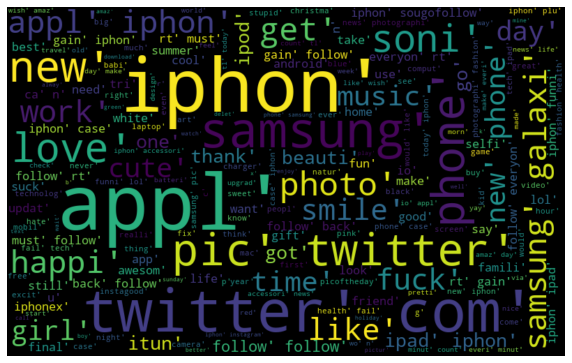

In [ ]:
all_words = ' '.join(l)
from matplotlib import pyplot as plt
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

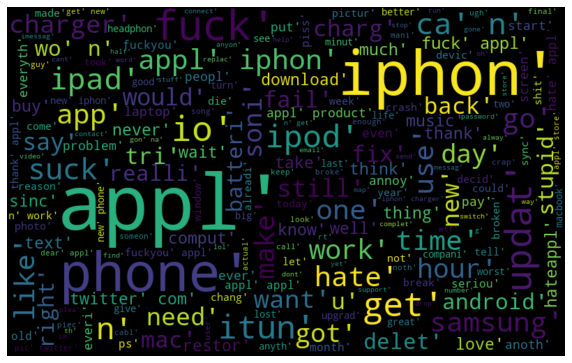

In [ ]:
negative_words = ' '.join([str(text) for text in combined['tweet'][combined['label'] == 1]])
wordcloud = WordCloud(width=800, height=500,random_state=21, max_font_size=110).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [ ]:
import pickle
# Let's pickle it for later use
combined.to_pickle("combined_data_clean.pkl")